In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [12]:
#loading the data to pandas
df_econ = pd.read_excel('korea_data.xlsx')
#replacing empty values with non values to avoid future errors
df_econ = df_econ.replace("..","nan") 
df_econ
#setting the index set to the year column
df_econ.index = df_econ['Year']
df_econ = df_econ.drop('Year', axis = 1)
df_econ
#setting the data type  
df_econ = df_econ.astype(float)
#using data only from 1969 to 2016
df_econ = df_econ.loc['1969':'2016']

#simplifying the column names
column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

# rename columns to smaller/ easier to read
df_econ = df_econ.rename(columns = column_names)

#checking for any null values
display("-"*100)
display(df_econ.isnull().any())

display("-"*100)
display(df_econ.head())

'----------------------------------------------------------------------------------------------------'

gdp_growth                 False
gross_capital_formation    False
pop_growth                 False
birth_rate                 False
broad_money_growth         False
final_consum_growth        False
gov_final_consum_growth    False
gross_cap_form_growth      False
hh_consum_growth           False
unemployment               False
dtype: bool

'----------------------------------------------------------------------------------------------------'

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


Checking for multicollinearity 

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
gdp_growth,1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
gross_capital_formation,0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
pop_growth,0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
birth_rate,0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
broad_money_growth,0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
final_consum_growth,0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
gov_final_consum_growth,0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
gross_cap_form_growth,0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
hh_consum_growth,0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
unemployment,-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


<AxesSubplot:>

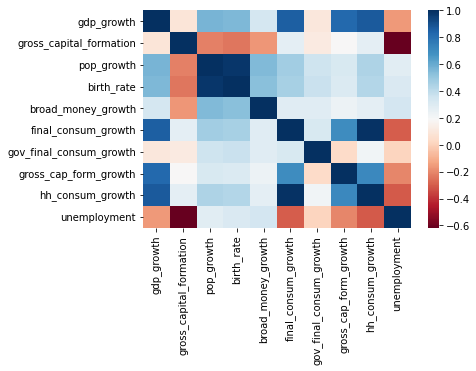

In [14]:
#displaying a correlation matrix of our data frame
corr = df_econ.corr()

#displaying the result
display(corr)

#plotting a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu")

In [45]:
df_econ_previous = df_econ

#dropping highly correlated variables
df_econ_after = df_econ.drop(['gdp_growth', 'birth_rate', 'final_consum_growth', 'gross_capital_formation'], axis=1)

X1 = sm.tools.add_constant(df_econ_previous)
X2 = sm.tools.add_constant(df_econ_after)

#creating a series for both
series_previous = pd.Series([variance_inflation_factor(X1.values, i ) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i ) for i in range(X2.shape[1])], index=X2.columns)

#displaying the series
print('PREVIOUS DATA')
print('-'*100)
display(series_previous)

print('DATA AFTER')
print('-'*100)
display(series_after)

PREVIOUS DATA
----------------------------------------------------------------------------------------------------


const                       314.550195
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174368
broad_money_growth            1.633079
final_consum_growth        2305.724583
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093634
unemployment                  2.800008
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                      27.891150
pop_growth                  1.971299
broad_money_growth          1.604644
gov_final_consum_growth     1.232229
gross_cap_form_growth       2.142992
hh_consum_growth            2.782698
unemployment                1.588410
dtype: float64

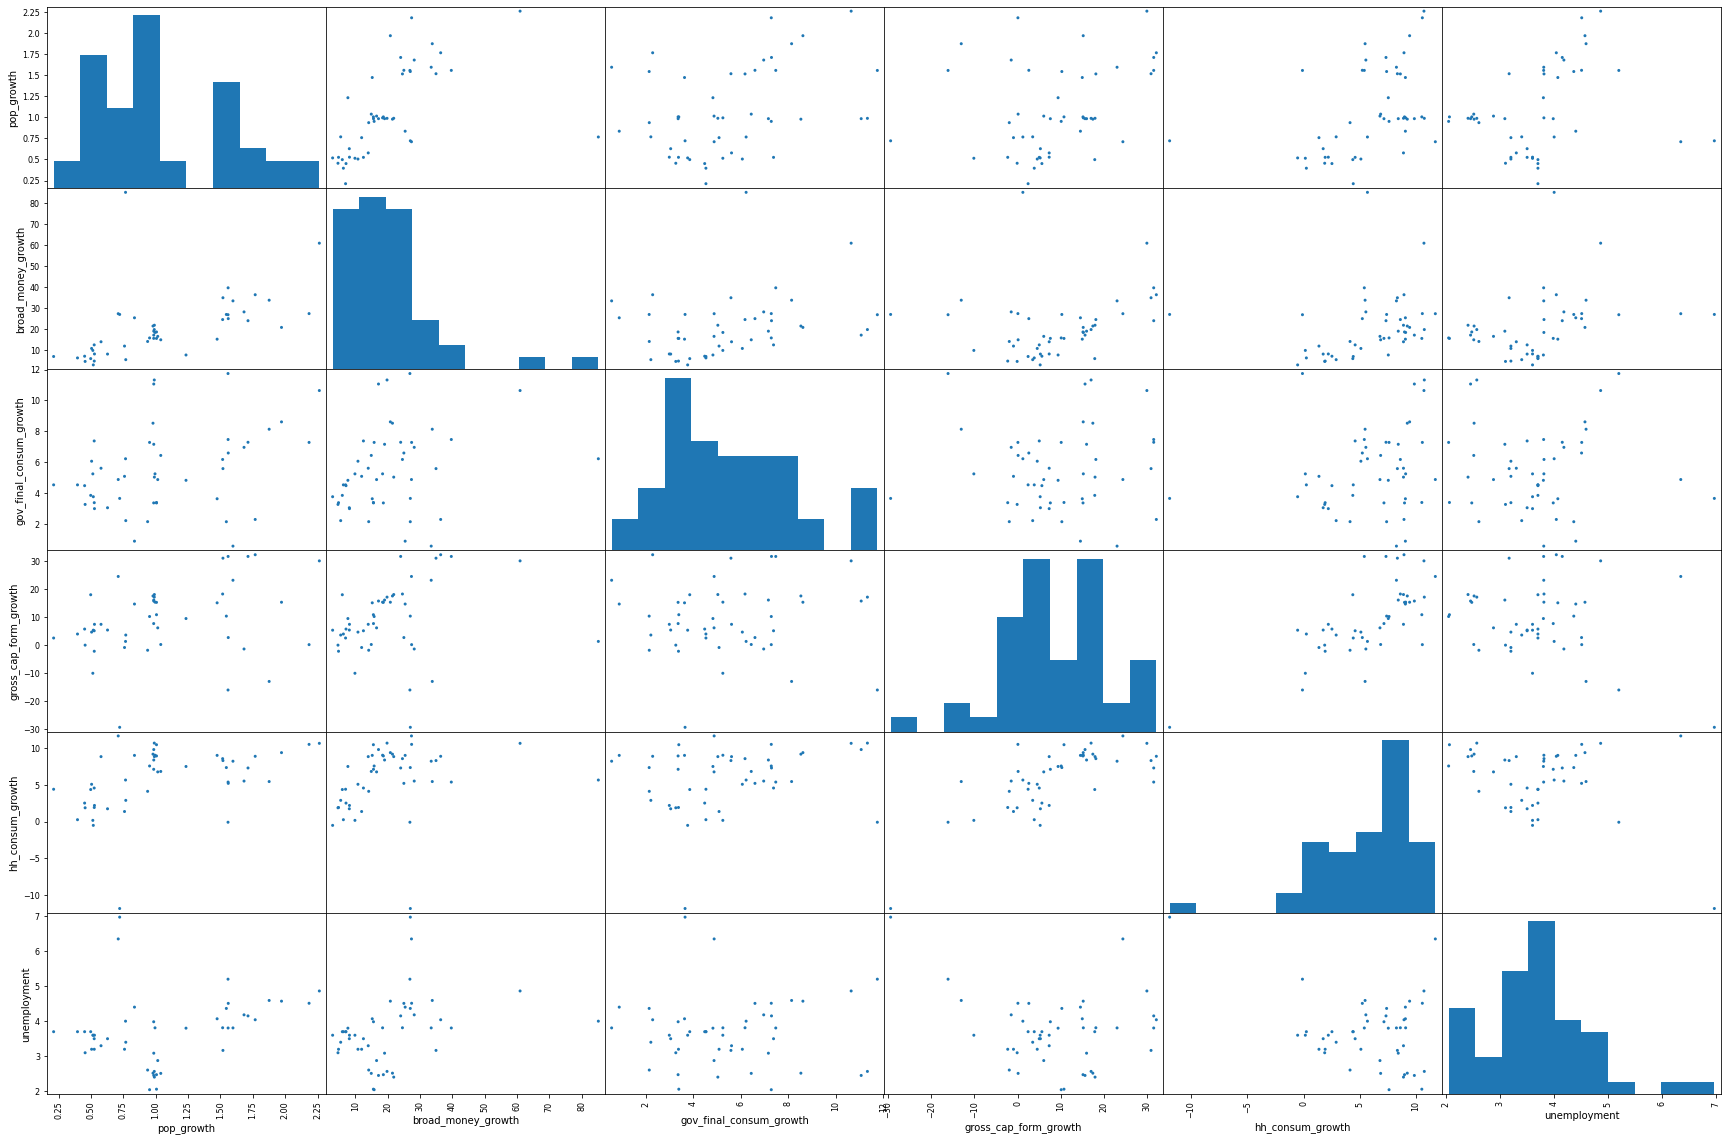

In [46]:
#visualising the data 
pd.plotting.scatter_matrix(df_econ_after, alpha=1, figsize=(30,20))

#displaying the plot
plt.show()



In [47]:
#getting the summary
df_desc = df_econ.describe()


# adding the standard deviation metric
df_desc.loc['+3_std'] = df_desc.loc['mean']+(df_desc.loc['std'] * 3)
df_desc.loc['-3_std'] = df_desc.loc['mean']-(df_desc.loc['std'] * 3) 
df_desc

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,19.908232,44.844034,2.600188,36.784945,64.671947,16.702571,13.285976,46.855416,18.562336,6.583944
-3_std,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


In [39]:
#filtering the outliers
remove_df_econ = df_econ[(np.abs(stats.zscore(df_econ))<3).all(axis=1)]

#displaying what rows have been removed
df_econ.index.difference(remove_df_econ.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

In [51]:
#defining our input variable as well as the output variable
df_econ_after = df_econ.drop(['birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)

X = df_econ_after.drop('gdp_growth', axis=1)
Y = df_econ_after[['gdp_growth']]
#splitting the data to to training and testing portian
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#creating an instance of our model
model_regression = LinearRegression()

#fit the model
model_regression.fit(X_train, y_train)

LinearRegression()

In [54]:
#retrieving the intercept and the coefficient 

intercept = model_regression.intercept_[0]
coefficient = model_regression.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# looping through the dictionary and print the data
for coefficient in zip(X.columns, model_regression.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coefficient[0],coefficient[1]))

The intercept for our model is 2.08
----------------------------------------------------------------------------------------------------
The Coefficient for pop_growth is 2.0
The Coefficient for broad_money_growth is -0.0017
The Coefficient for gov_final_consum_growth is -0.21
The Coefficient for gross_cap_form_growth is 0.14
The Coefficient for hh_consum_growth is 0.51
The Coefficient for unemployment is 0.027


In [56]:
#predictions
predict_y = model_regression.predict(X_test)

#display initial 5
predict_y[:5]

array([[ 7.61317534],
       [ 6.31344066],
       [ 5.06818662],
       [ 4.19869856],
       [11.11885324]])

In [57]:
#defining the input value
X2 = sm.add_constant(X)

#making OLS model
model = sm.OLS(Y, X2)

#modelling the data
estimated = model.fit()

In [71]:
#_, pval, __, f_pval = diag.het_white(estimated.resid,estimated.model.exog, retry = False)

# Run the White's test
_, pval, __, f_pval = diag.het_white(estimated.resid, estimated.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(estimated.resid, estimated.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

0.43365711028670284 0.5090811918587079
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 0.4337
We fail to reject the null hypthoesis, so there is no heterosecdasticity. 

0.25183646701202594 0.2662794557854114
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.2518
We fail to reject the null hypthoesis, so there is no heterosecdasticity.


In [ ]:
lag = min(10, ())

diag.acorr_ljungbox(estimated.resid, lags=lag)